# Data analysis using completely cleaned data ONLY

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv("Clean Data/final_clean_death_data_2018.csv")


In [38]:
pa_state = df[df["County"]=="Pennsylvania"]

state_hotline = df["hotlinecall_2018"].mean()
pa_state["hotlinecall_2018"]=state_hotline
state_box=df["Number Boxes"].mean()
pa_state["Number Boxes"]=state_box
pa_state['2019_Population'] = df['2019_Population'].sum()

df = df[df["County"]!="Pennsylvania"]

pa_state

C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,County,2019_Population,death_count,Any Drug Overdose Deaths,Opioid Overdose Deaths,%_of_any_od_death_over_all_deaths,%_of_op_od_death_over_all_deaths,Annual Any Overdose ED Rate by Visit,Annual Opioid Overdose ED Rate by Visit,Annual Any Overdose ED Rate by Population,Annual Opioid Overdose ED Rate by Population,hotlinecall_2018,Number Boxes
49,Pennsylvania,12807060.0,134571.0,4413.0,3915.0,3.28,2.91,78.03,17.12,8.64,1.92,117.208955,10.223881


In [39]:
df.describe()

,2019_Population,death_count,Any Drug Overdose Deaths,Opioid Overdose Deaths,%_of_any_od_death_over_all_deaths,%_of_op_od_death_over_all_deaths,Annual Any Overdose ED Rate by Visit,Annual Opioid Overdose ED Rate by Visit,Annual Any Overdose ED Rate by Population,Annual Opioid Overdose ED Rate by Population,hotlinecall_2018,Number Boxes
count,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,1.911501e+05,2008.522388,64.955224,57.089552,2.080448,1.749552,55.739851,8.979701,6.787761,1.126567,117.208955,10.223881
std,2.754370e+05,2722.129794,150.938923,128.314567,1.503115,1.396515,29.826903,10.506892,2.832580,1.148801,257.848648,10.922344
min,4.492000e+03,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.230450e+04,465.500000,1.000000,1.000000,0.560000,0.255000,42.600000,0.000000,5.310000,0.000000,13.000000,3.500000
50%,8.506300e+04,991.000000,19.000000,16.000000,2.080000,1.820000,58.880000,6.580000,6.640000,0.920000,42.000000,6.000000
75%,2.090695e+05,2544.500000,66.000000,57.500000,3.035000,2.830000,70.100000,13.790000,8.290000,1.640000,111.000000,12.500000
max,1.584138e+06,14528.000000,1118.000000,941.000000,7.700000,6.480000,121.930000,44.640000,14.780000,5.430000,1831.000000,50.000000


In [40]:
df.head()

,County,2019_Population,death_count,Any Drug Overdose Deaths,Opioid Overdose Deaths,%_of_any_od_death_over_all_deaths,%_of_op_od_death_over_all_deaths,Annual Any Overdose ED Rate by Visit,Annual Opioid Overdose ED Rate by Visit,Annual Any Overdose ED Rate by Population,Annual Opioid Overdose ED Rate by Population,hotlinecall_2018,Number Boxes
0,Adams,102811.0,1055.0,16.0,16.0,1.52,1.52,63.24,8.55,6.47,1.00,27.0,11.0
1,Allegheny,1218452.0,14051.0,487.0,411.0,3.47,2.93,73.27,18.05,8.25,2.15,1003.0,38.0
2,Armstrong,65263.0,855.0,22.0,21.0,2.57,2.46,33.59,2.75,7.39,1.94,22.0,9.0
3,Beaver,164742.0,2185.0,43.0,40.0,1.97,1.83,66.89,2.02,7.72,0.66,121.0,16.0
4,Bedford,48176.0,596.0,1.0,1.0,0.17,0.17,50.39,7.60,5.62,0.72,12.0,4.0


In [41]:
# df = df.set_index('County')
df.sort_values(by='%_of_op_od_death_over_all_deaths')


bins = [-1,0.255,2.83,6.480000]
labels = ['Lower', 'Middle', 'Higher']

df['Percentile_of_opioid_overdose_deaths'] = pd.cut(df['%_of_op_od_death_over_all_deaths'], bins, labels=labels)

In [42]:
df.head()

,County,2019_Population,death_count,Any Drug Overdose Deaths,Opioid Overdose Deaths,%_of_any_od_death_over_all_deaths,%_of_op_od_death_over_all_deaths,Annual Any Overdose ED Rate by Visit,Annual Opioid Overdose ED Rate by Visit,Annual Any Overdose ED Rate by Population,Annual Opioid Overdose ED Rate by Population,hotlinecall_2018,Number Boxes,Percentile_of_opioid_overdose_deaths
0,Adams,102811.0,1055.0,16.0,16.0,1.52,1.52,63.24,8.55,6.47,1.00,27.0,11.0,Middle
1,Allegheny,1218452.0,14051.0,487.0,411.0,3.47,2.93,73.27,18.05,8.25,2.15,1003.0,38.0,Higher
2,Armstrong,65263.0,855.0,22.0,21.0,2.57,2.46,33.59,2.75,7.39,1.94,22.0,9.0,Middle
3,Beaver,164742.0,2185.0,43.0,40.0,1.97,1.83,66.89,2.02,7.72,0.66,121.0,16.0,Middle
4,Bedford,48176.0,596.0,1.0,1.0,0.17,0.17,50.39,7.60,5.62,0.72,12.0,4.0,Lower


In [77]:
df2 = df.groupby(by='Percentile_of_opioid_overdose_deaths').mean()

# df2 = df2.reset_index(drop=False)
df2.head()

,2019_Population,death_count,Any Drug Overdose Deaths,Opioid Overdose Deaths,%_of_any_od_death_over_all_deaths,%_of_op_od_death_over_all_deaths,Annual Any Overdose ED Rate by Visit,Annual Opioid Overdose ED Rate by Visit,Annual Any Overdose ED Rate by Population,Annual Opioid Overdose ED Rate by Population,hotlinecall_2018,Number Boxes
Percentile_of_opioid_overdose_deaths,,,,,,,,,,,,
Lower,39588.176471,459.764706,3.058824,0.705882,0.549412,0.135294,33.783529,1.587059,4.658235,0.204118,11.117647,4.764706
Middle,176520.212121,1850.969697,40.636364,36.606061,1.954545,1.654545,57.736970,7.659697,6.551212,0.926667,79.606061,11.212121
Higher,371111.411765,3863.117647,174.058824,153.235294,3.855882,3.548235,73.819412,18.934706,9.376471,2.437059,296.294118,13.764706


In [66]:
%matplotlib inline
sns.distplot(df['2019_Population'].loc['Percentile_of_opioid_overdose_deaths'] == 'Lower')
plt.show()

KeyError: 'Percentile_of_opioid_overdose_deaths'

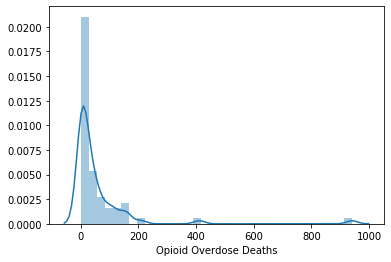

In [56]:
%matplotlib inline
sns.distplot(df['Opioid Overdose Deaths'])
plt.show()

<IPython.core.display.Javascript object>


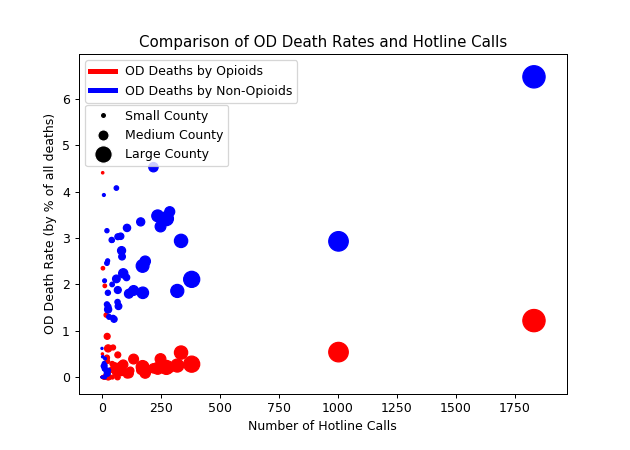

In [123]:
%matplotlib notebook
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(7, 5)

scatter = ax.scatter(df['hotlinecall_2018'], (df['%_of_any_od_death_over_all_deaths']- df['%_of_op_od_death_over_all_deaths']), s=(df['2019_Population']/5000), c='red')
scatter2 = ax.scatter(df['hotlinecall_2018'], df['%_of_op_od_death_over_all_deaths'], s=(df['2019_Population']/5000), c='blue')

plt.xlabel('Number of Hotline Calls')
plt.ylabel('OD Death Rate (by % of all deaths)')
plt.title("Comparison of OD Death Rates and Hotline Calls")

colors = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

sizes = [Line2D([0], [0], markerfacecolor='black', color='w', marker='o', markersize=5),
            Line2D([0], [0], markerfacecolor='black', color='w', marker='o', markersize=9),
            Line2D([0], [0], markerfacecolor='black', color='w', marker='o', markersize=14)]

legend2 = plt.legend(colors, ['OD Deaths by Opioids', 'OD Deaths by Non-Opioids'], loc="upper left") 
plt.legend(sizes, ['Small County', 'Medium County', 'Large County'], bbox_to_anchor=(0,.76), loc="center left")
plt.gca().add_artist(legend2)


# Linear Regression lines
# x1 = df['hotlinecall_2018']
# y1 = (df['%_of_any_od_death_over_all_deaths']- df['%_of_op_od_death_over_all_deaths'])
# x2 = df['hotlinecall_2018']
# y2 = df['%_of_op_od_death_over_all_deaths']

# x_new1 = df['hotlinecall_2018']
# y_new1 = model.predict(x_new1[:, ''])
# x_new2 = df['hotlinecall_2018']
# y_new2 = model.predict(x_new2[:, ])


# model.fit(x, y)

# model = LinearRegression()
# model.fit(x1, y1)
# model.fit(x2, y2)

# ax.plot(x_new1, y_new1)
# ax.plot(x_new2, y_new2)

fig.savefig('death_rate_vs_hotline.png')
# plt.show()

<IPython.core.display.Javascript object>


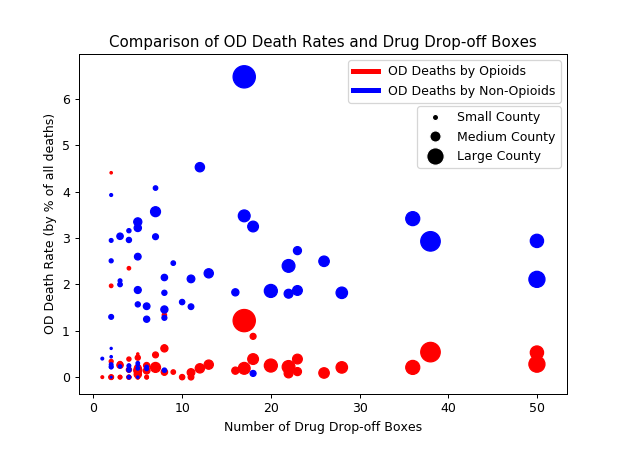

In [124]:
%matplotlib notebook
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)


scatter = ax.scatter(df['Number Boxes'], (df['%_of_any_od_death_over_all_deaths']- df['%_of_op_od_death_over_all_deaths']), s=(df['2019_Population']/5000), c='red')
scatter2 = ax.scatter(df['Number Boxes'], df['%_of_op_od_death_over_all_deaths'], s=(df['2019_Population']/5000), c='blue')

plt.xlabel('Number of Drug Drop-off Boxes')
plt.ylabel('OD Death Rate (by % of all deaths)')
plt.title("Comparison of OD Death Rates and Drug Drop-off Boxes")

colors = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

sizes = [Line2D([0], [0], markerfacecolor='black', color='w', marker='o', markersize=5),
            Line2D([0], [0], markerfacecolor='black', color='w', marker='o', markersize=9),
            Line2D([0], [0], markerfacecolor='black', color='w', marker='o', markersize=14)]

legend2 = plt.legend(colors, ['OD Deaths by Opioids', 'OD Deaths by Non-Opioids'], loc="upper right") 
plt.legend(sizes, ['Small County', 'Medium County', 'Large County'], bbox_to_anchor=(1,.755), loc="center right")
plt.gca().add_artist(legend2)


fig.savefig('death_rate_vs_boxes.png')
plt.show()



<IPython.core.display.Javascript object>


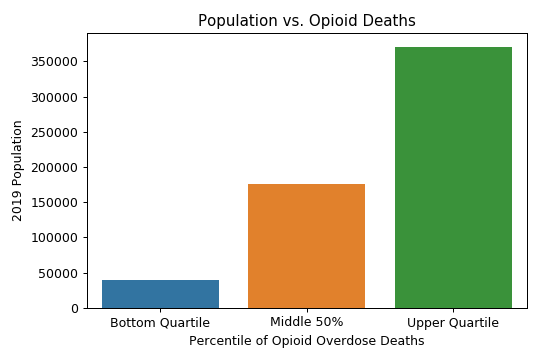

In [105]:
# %matplotlib notebook
# fig, ax = plt.subplots()

# deaths = [1, 4, 7]
# hotline = [2, 5, 8]
# boxes = [3, 6, 9]

# x = np.arange(len(labels))
# width = 0.35

# rects1 = ax.bar(deaths, df2.loc['Lower','%_of_op_od_death_over_all_deaths'], width, label='Lower Death Rate')
# rects2 = ax.bar(hotline, df2.loc['Middle', '%_of_op_od_death_over_all_deaths'], df2.loc['Middle','%_of_op_od_death_over_all_deaths'], width, label='Middle 50% Death Rate')
# rects3 = ax.bar(boxes, df2.loc['Higher','%_of_op_od_death_over_all_deaths'], width, label='Higher Death Rate')


%matplotlib notebook
fig, ax = plt.subplots()

labels = ['Bottom Quartile', 'Middle 50%', 'Upper Quartile']


ax = sns.barplot(x=df['Percentile_of_opioid_overdose_deaths'], y=df['2019_Population'], ci=None)
ax.set_ylabel('2019 Population')
ax.set_xlabel('Percentile of Opioid Overdose Deaths')
ax.set_title('Population vs. Opioid Deaths')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()
fig.savefig('Pop_vs_opioid_bar.png')


<IPython.core.display.Javascript object>


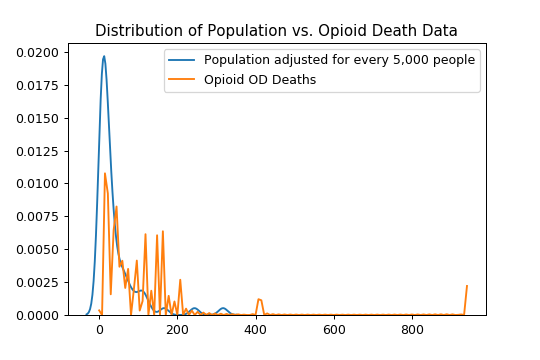

In [103]:
%matplotlib notebook
fig, ax = plt.subplots()
sns.kdeplot(df['2019_Population']/5000, label="Population adjusted for every 5,000 people")
sns.kdeplot(df['Opioid Overdose Deaths'], bw=.2, label="Opioid OD Deaths")
plt.legend();
ax.set_title('Distribution of Population vs. Opioid Death Data')
fig.savefig('Pop_vs_opioid_dist.png')



<IPython.core.display.Javascript object>


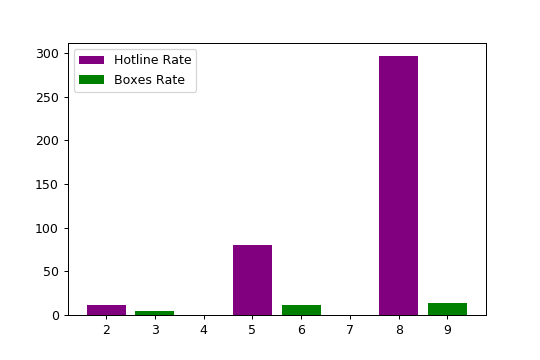

In [32]:
%matplotlib notebook

labels = ['Lower Death Rate', 'Middle 50% Death Rate', 'High Death Rate']
deaths = [1, 4, 7]
hotline = [2, 5, 8]
boxes = [3, 6, 9]


# fig1 = plt.bar(deaths, df2['%_of_op_od_death_over_all_deaths'].to_list(), color='red', label='Death Rate')
fig2 = plt.bar(hotline, df2['hotlinecall_2018'].to_list(), color='purple', label='Hotline Rate')
fig3 = plt.bar(boxes, df2['Number Boxes'].to_list(), color='green', label='Boxes Rate')

def autolabel(ps):
    for p in ps:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., 1*height, '$' + str('%d' % int(height)), ha='center', va='bottom')

# plt.xticks(labels)
autolabel(fig2)
autolabel(fig3)


plt.legend()
plt.show()

In [ ]:
# ANOVA vs high and low counties for death rates in counties